In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\singh\Downloads\alphabet_stock_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-01,1122.000000,1129.689941,1097.449951,1105.619995,1105.619995,2343100
1,2020-04-02,1098.260010,1126.859985,1096.400024,1120.839966,1120.839966,1964900
2,2020-04-03,1119.015015,1123.540039,1079.810059,1097.880005,1097.880005,2313400
3,2020-04-06,1138.000000,1194.660034,1130.939941,1186.920044,1186.920044,2664700
4,2020-04-07,1221.000000,1225.000000,1182.229980,1186.510010,1186.510010,2387300


In [3]:
start_date = pd.to_datetime('2020-4-1')
end_date = pd.to_datetime('2020-9-30')                         
df['Date'] = pd.to_datetime(df['Date']) 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)

<Figure size 2160x2160 with 0 Axes>

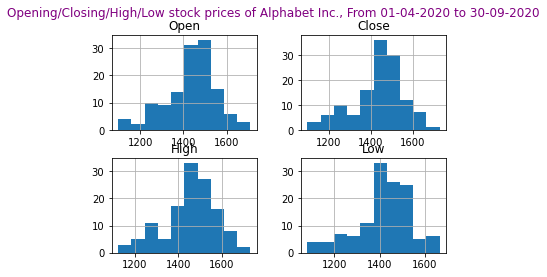

In [6]:
df1 = df.loc[new_df]
df2 = df1[['Open','Close','High','Low']]

plt.figure(figsize=(30,30))
df2.hist()
plt.suptitle('Opening/Closing/High/Low stock prices of Alphabet Inc., From 01-04-2020 to 30-09-2020', fontsize=12, color='purple')
plt.show()

In [7]:
#Q12
df['Date'] = pd.to_datetime(df['Date']) 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('Date')

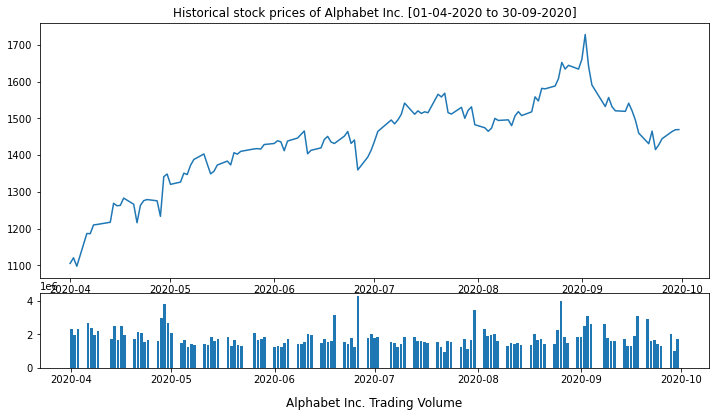

In [8]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data["Close"])
plt.title('Historical stock prices of Alphabet Inc. [01-04-2020 to 30-09-2020]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['Volume'])
plt.title('\nAlphabet Inc. Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

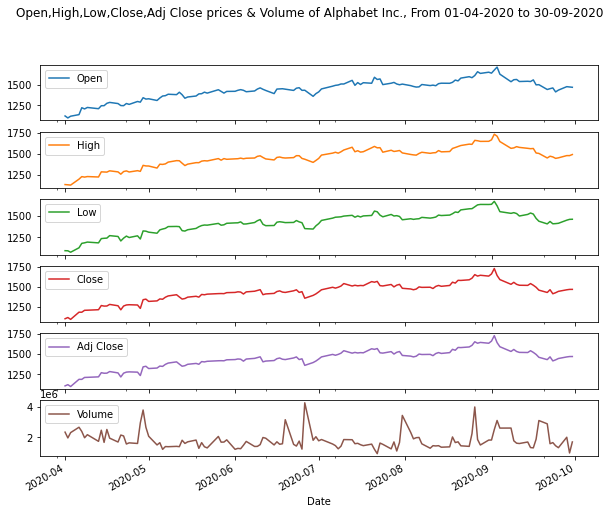

In [14]:
#Q13
stock_data.plot(subplots = True, figsize = (10, 8))
plt.legend(loc = 'best')
plt.suptitle('Open,High,Low,Close,Adj Close prices & Volume of Alphabet Inc., From 01-04-2020 to 30-09-2020', fontsize=12, color='black')
plt.show()

In [15]:
#Q14
close_px = stock_data['Adj Close']
stock_data['SMA_30_days'] = stock_data.iloc[:,4].rolling(window=30).mean() 
stock_data['SMA_40_days'] = stock_data.iloc[:,4].rolling(window=40).mean()

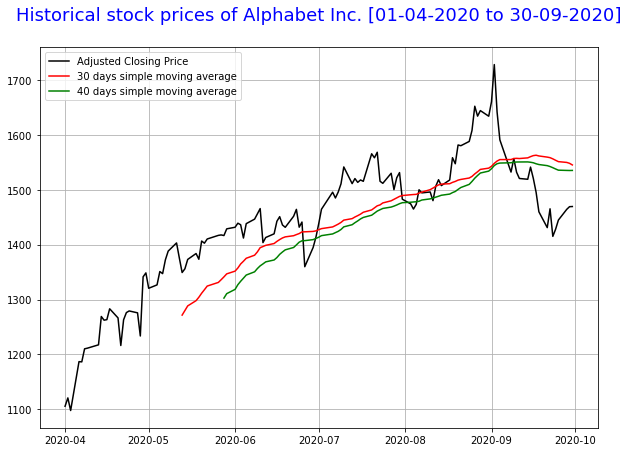

In [20]:
plt.figure(figsize=[10,7])
plt.grid(True)
plt.title('Historical stock prices of Alphabet Inc. [01-04-2020 to 30-09-2020]\n',fontsize=18, color='blue')
plt.plot(stock_data['Adj Close'],label='Adjusted Closing Price', color='black')
plt.plot(stock_data['SMA_30_days'],label='30 days simple moving average', color='red')
plt.plot(stock_data['SMA_40_days'],label='40 days simple moving average', color='green')
plt.legend(loc=2)
plt.show()

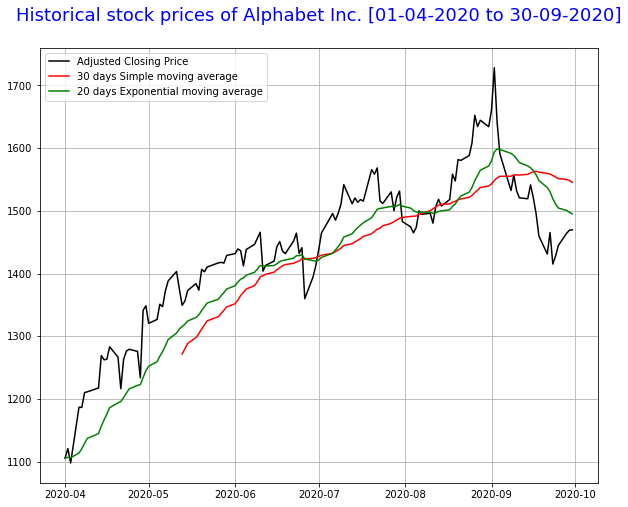

In [22]:
#Q15
stock_data['EMA_20_days'] = stock_data.iloc[:,4].ewm(span=20,adjust=False).mean()

plt.figure(figsize=[10,8])
plt.grid(True)
plt.title('Historical stock prices of Alphabet Inc. [01-04-2020 to 30-09-2020]\n',fontsize=18, color='blue')
plt.plot(stock_data['Adj Close'],label='Adjusted Closing Price', color='black')
plt.plot(stock_data['SMA_30_days'],label='30 days Simple moving average', color='red')
plt.plot(stock_data['EMA_20_days'],label='20 days Exponential moving average', color='green')
plt.legend(loc=2)
plt.show()

In [23]:
#Q16
df1 = df.loc[new_df]
df2 = df1.set_index('Date')

<Figure size 1080x720 with 0 Axes>

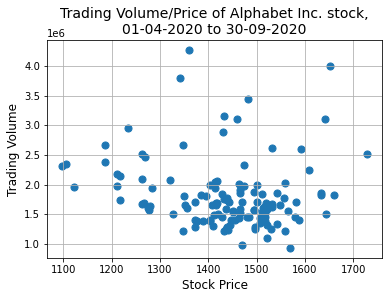

In [25]:
x= ['Close']; y = ['Volume']

plt.figure(figsize=[15,10])
df2.plot.scatter(x, y, s=50);
plt.grid(True)
plt.title('Trading Volume/Price of Alphabet Inc. stock,\n01-04-2020 to 30-09-2020', fontsize=14, color='black')
plt.xlabel("Stock Price",fontsize=12, color='black')
plt.ylabel("Trading Volume", fontsize=12, color='black') 
plt.show()

In [26]:
#Q17
df2 = df1[['Date', 'Adj Close']]
df3 = df2.set_index('Date')
daily_changes = df3.pct_change(periods=1)

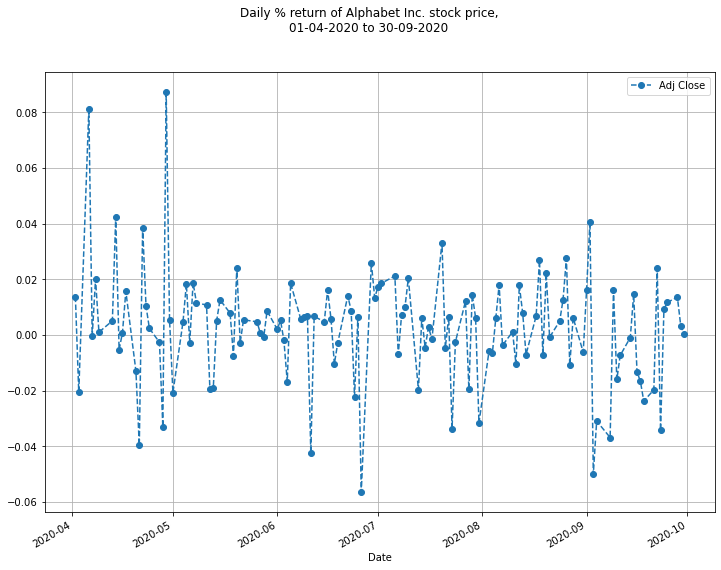

In [31]:
daily_changes['Adj Close'].plot(figsize=(12,9),legend=True,linestyle='--',marker='o')
plt.suptitle('Daily % return of Alphabet Inc. stock price,\n01-04-2020 to 30-09-2020', fontsize=12, color='black')
plt.grid(True)
plt.show() 

In [32]:
#Q18
df2 = df1[['Date', 'Close']]
df3 = df2.set_index('Date')
data_filled = df3.asfreq('D', method='ffill')
data_returns = data_filled.pct_change()
data_std = data_returns.rolling(window=30, min_periods=30).std()

In [37]:
data_std

,Close
Date,
2020-04-01,NaN
2020-04-02,NaN
2020-04-03,NaN
2020-04-04,NaN
2020-04-05,NaN
...,...
2020-09-26,0.019043
2020-09-27,0.018964
2020-09-28,0.019224


<Figure size 2160x1800 with 0 Axes>

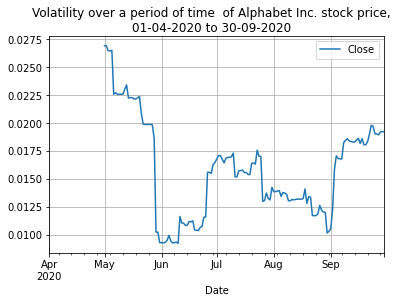

In [41]:
plt.figure(figsize=(30,25))
data_std.plot()
plt.suptitle('Volatility over a period of time  of Alphabet Inc. stock price,\n01-04-2020 to 30-09-2020', fontsize=12, color='black')
plt.grid(True)
plt.show() 

In [43]:
#Q19
df2 = df1[['Date', 'Adj Close']]
df3 = df2.set_index('Date')
daily_changes = df3.pct_change(periods=1)

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


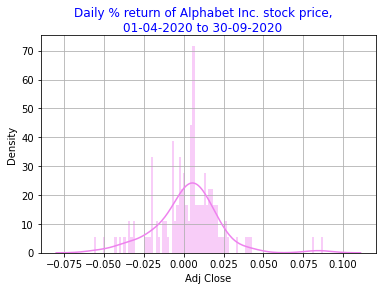

In [50]:
sns.distplot(daily_changes['Adj Close'].dropna(),bins=100,color='violet')
plt.suptitle('Daily % return of Alphabet Inc. stock price,\n01-04-2020 to 30-09-2020', fontsize=12, color='blue')
plt.grid(True)
plt.show()